## Overview

A magnitude 7.8 earthquake struck Nepal on April 25, 2015, toppling multi-story buildings in Kathmandu, the capital, and creating landslides and avalanches in the Himalaya Mountains. Nearly 9,000 people died and more than 22,000 suffered injuries.

The quake was followed by hundreds of aftershocks, and only 17 days later, there was another major quake, a magnitude 7.3 temblor. Thirty-nine of the nation’s 75 districts with a population of 8 million people — about a third of the national population — were affected. Hundreds of thousands of people lost everything and faced extreme poverty. 

More than 600,000 homes were destroyed and more than 288,000 were damaged in the 14 worst-hit districts. Hundreds of thousands of people lost everything and faced extreme poverty and homeless. 

## Business Problem

The Federal Democratic Republic of Nepal wants to avoid future building damages by reinforcing homes/buildings. They are wanting to know the possible damage risk level that current homes/buildings are at. So, they can better focus their resources, and protect their citizens of Nepal if and when another major earthquake occurs.

## Data Understanding

The data that will be used to predict the damage risk level comes from https://www.drivendata.org/, while original data comes from http://eq2015.npc.gov.np/#/. One of the largest dataset done on the aftermath of an earthquake.

The dataset mainly consists of 260601 rows each with information on the building structure and ownership. There are 40 columns in this dataset, where the building_id column is a unique and the target. The remaining 38 features are described in the section below. 

Driven Data also obfuscated random lowercase ascii characters to the categorical variables. Using the some of the original data we should be able to find out what this varilbes are and hopefully get some insight when doing the Exploratory Data Analysis (EDA).

### Target

|Target| Info|
|:-----| :-----|
|Grade 1| represents low damage|
|Grade 2| represents a medium amount of damage|
|Grade 3| represents almost complete destruction|

### Features

|Feature| Info|
|:-----| :-----|
|geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int):| geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.|
|count_floors_pre_eq (type: int):| number of floors in the building before the earthquake.|
|age (type: int):| age of the building in years.|
|area_percentage (type: int):| normalized area of the building footprint.|
|height_percentage (type: int):| normalized height of the building footprint.|
|land_surface_condition (type: categorical):| surface condition of the land where the building was built. Possible values: n, o, t.|
|foundation_type (type: categorical):| type of foundation used while building. Possible values: h, i, r, u, w.|
|roof_type (type: categorical):| type of roof used while building. Possible values: n, q, x.|
|ground_floor_type (type: categorical):| type of the ground floor. Possible values: f, m, v, x, z.|
|other_floor_type (type: categorical):| type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.|
|position (type: categorical):| position of the building. Possible values: j, o, s, t.|
|plan_configuration (type: categorical):| building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.|
|has_superstructure_adobe_mud (type: binary):| flag variable that indicates if the superstructure was made of Adobe/Mud.|
|has_superstructure_mud_mortar_stone (type: binary):| flag variable that indicates if the superstructure was made of Mud Mortar - Stone.|
|has_superstructure_stone_flag (type: binary):| flag variable that indicates if the superstructure was made of Stone.|
|has_superstructure_cement_mortar_stone (type: binary):| flag variable that indicates if the superstructure was made of Cement Mortar - Stone.|
|has_superstructure_mud_mortar_brick (type: binary):| flag variable that indicates if the superstructure was made of Mud Mortar - Brick.|
|has_superstructure_cement_mortar_brick (type: binary):| flag variable that indicates if the superstructure was made of Cement Mortar - Brick.|
|has_superstructure_timber (type: binary):| flag variable that indicates if the superstructure was made of Timber.|
|has_superstructure_bamboo (type: binary):| flag variable that indicates if the superstructure was made of Bamboo.|
|has_superstructure_rc_non_engineered (type: binary):| flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.|
|has_superstructure_rc_engineered (type: binary):| flag variable that indicates if the superstructure was made of engineered reinforced concrete.|
|has_superstructure_other (type: binary):| flag variable that indicates if the superstructure was made of any other material.|
|legal_ownership_status (type: categorical):| legal ownership status of the land where building was built. Possible values: a, r, v, w.|
|count_families (type: int):| number of families that live in the building.|
|has_secondary_use (type: binary):| flag variable that indicates if the building was used for any secondary purpose.|
|has_secondary_use_agriculture (type: binary):| flag variable that indicates if the building was used for agricultural purposes.|
|has_secondary_use_hotel (type: binary):| flag variable that indicates if the building was used as a hotel.|
|has_secondary_use_rental (type: binary):| flag variable that indicates if the building was used for rental purposes.|
|has_secondary_use_institution (type: binary):| flag variable that indicates if the building was used as a location of any institution.|
|has_secondary_use_school (type: binary):| flag variable that indicates if the building was used as a school.|
|has_secondary_use_industry (type: binary):| flag variable that indicates if the building was used for industrial purposes.|
|has_secondary_use_health_post (type: binary):| flag variable that indicates if the building was used as a health post.|
|has_secondary_use_gov_office (type: binary):| flag variable that indicates if the building was used fas a government office.|
|has_secondary_use_use_police| binary| flag variable that indicates if the building was used as a police station.|
|has_secondary_use_other (type: binary):| flag variable that indicates if the building was secondarily used for other purposes.|

## Data Preparation

### Import Libraries and Tools

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

import pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as Pipeline

### Read in Datasets for Model

In [2]:
df_values = pd.read_csv('Data/train_values.csv')
df_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df_labels = pd.read_csv('Data/train_labels.csv')
df_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [4]:
df = df_values.merge(df_labels, on='building_id')
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


### Checking for Missing Values

In [5]:
df.isna().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

No missing values to worry about.

### Checking Featuer Types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Some of the features that are mean to be Booleans are classaffied as int64.

In [7]:
bool_list = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 
             'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 
             'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 
             'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 
             'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 
             'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 
             'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 
             'has_secondary_use_other']

In [8]:
for name in bool_list:
    df[name] = df[name].astype('bool')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

### Categorical Column Value Names Data

In [10]:
df_building_structure = pd.read_csv('Data/csv_building_structure.csv')
df_building_structure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [11]:
df_building_ownership_and_use = pd.read_csv('Data/csv_building_ownership_and_use.csv')
df_building_ownership_and_use.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [12]:
df_og = df_building_structure.merge(df_building_ownership_and_use, on=['building_id', 'district_id', 
                                                                       'vdcmun_id', 'ward_id'])
df_og.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [13]:
categorical_list = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 
                    'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']

In [14]:
for name in categorical_list:
    print('-----------------')
    print(name)
    print('***')
    print(df_og[name].value_counts())
    print('***')
    print(df[name].value_counts())

-----------------
land_surface_condition
***
Flat              631675
Moderate slope    105640
Steep slope        24791
Name: land_surface_condition, dtype: int64
***
t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64
-----------------
foundation_type
***
Mud mortar-Stone/Brick    628716
Bamboo/Timber              57473
Cement-Stone/Brick         39245
RC                         32120
Other                       4552
Name: foundation_type, dtype: int64
***
r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64
-----------------
roof_type
***
Bamboo/Timber-Light roof    503748
Bamboo/Timber-Heavy roof    213774
RCC/RB/RBC                   44584
Name: roof_type, dtype: int64
***
n    182842
q     61576
x     16183
Name: roof_type, dtype: int64
-----------------
ground_floor_type
***
Mud            618217
RC              73149
Brick/Stone     66093
Timber           3594
Other            1053
Name: ground_floor_type, dty

Look at the print out it looks like most of the random values in the df dataset do correspond to the df_og dataset. Will use the values to replace the random values.

In [15]:
def replace_categorical_value(name):
    '''
    This function will take in a column name and loop thought the value count index from the df dataset and replace the
    the value with the value count index for the df_og data set.
    '''
    for i in range(len(df[name].value_counts().index)):
        df[name].replace({df[name].value_counts().index[i]: 
                                              df_og[name].value_counts().index[i]}, inplace=True)

In [16]:
for cat_value in categorical_list:
    replace_categorical_value(cat_value)

In [17]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,True,True,False,False,False,False,False,False,False,False,False,Private,1,False,False,False,False,False,False,False,False,False,False,False,3
1,28830,8,900,2812,2,10,8,7,Steep slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,RC,TImber/Bamboo-Mud,Not attached,Rectangular,False,True,False,False,False,False,False,False,False,False,False,Private,1,False,False,False,False,False,False,False,False,False,False,False,2
2,94947,21,363,8973,2,10,5,5,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Attached-1 side,Rectangular,False,True,False,False,False,False,False,False,False,False,False,Private,1,False,False,False,False,False,False,False,False,False,False,False,3
3,590882,22,418,10694,2,10,6,5,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,False,True,False,False,False,False,True,True,False,False,False,Private,1,False,False,False,False,False,False,False,False,False,False,False,2
4,201944,11,131,1488,3,30,8,9,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,True,False,False,False,False,False,False,False,False,False,False,Private,1,False,False,False,False,False,False,False,False,False,False,False,3


## Exploratory Data Analysis (EDA)

### Class Counts

Lets take a look at are target classes and see what kind of counts we have.

In [18]:
df['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

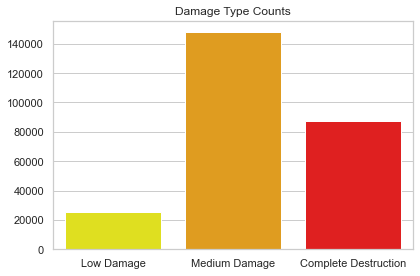

In [19]:
fig, ax = plt.subplots()

x = df['damage_grade'].value_counts().index
y = df['damage_grade'].value_counts().values

labels = ['Low Damage', 'Medium Damage', 'Complete Destruction']
color = ['yellow','orange', 'red']

ax = sns.barplot(x=x, y=y, palette=color)
ax.set_xticklabels(labels)
ax.set_title('Damage Type Counts')
ax.set_facecolor('white')

plt.tight_layout()
fig.savefig('Images/classes.png')

Looks like are classes are imbalance this may cuase an issues down the road when we start training are models.

### Ploting Categorical Columns

In [20]:
# Define a function to loop thought a list of column names.

def countplot_loop(column_list):
    '''
    This function will loop thought a given list
    and return a countplot for each column name in
    a list.
    '''
    for name in column_list:
        fig, ax = plt.subplots()

        color = ['yellow','orange', 'red']
        ax = sns.countplot(x=name, hue='damage_grade', palette=color, data=df)

        plt.tight_layout()
        fig.savefig(f'Images/{name}.png')

#### Superstructure Columns

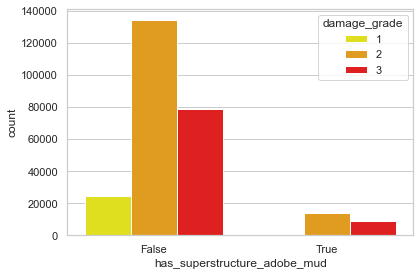

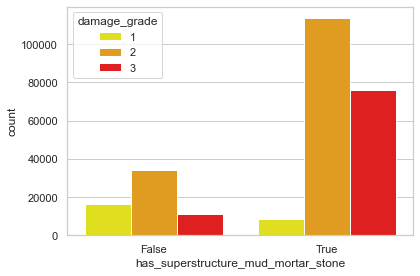

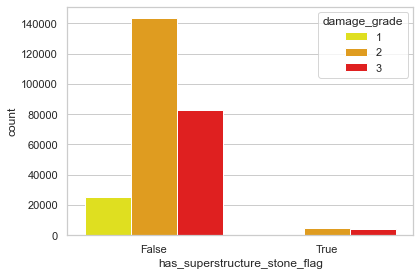

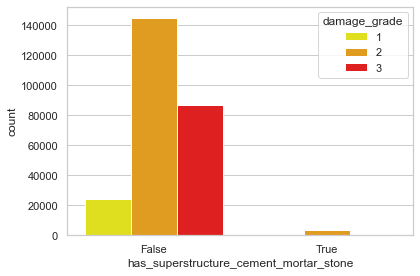

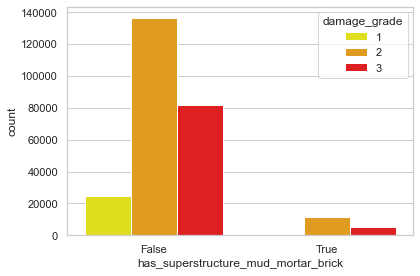

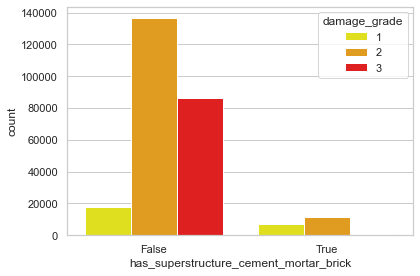

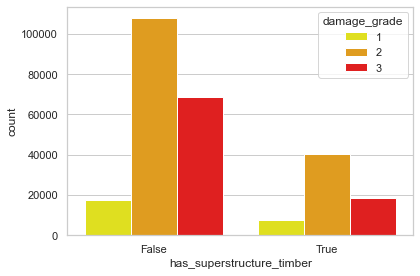

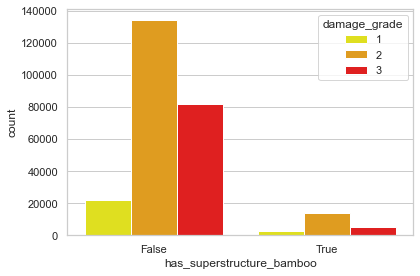

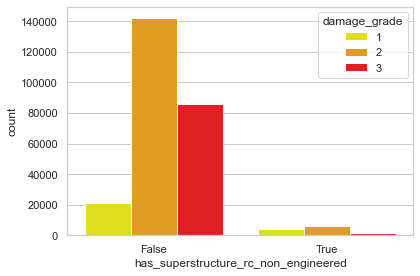

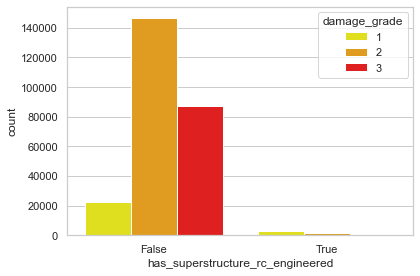

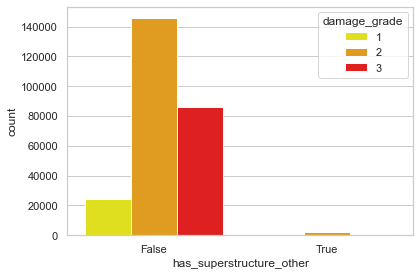

In [21]:
column_superstructure = list(df.columns)[15:26]

countplot_loop(column_superstructure)

#### Secondary Columns

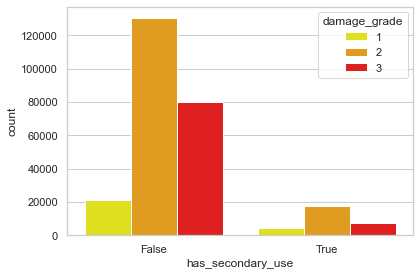

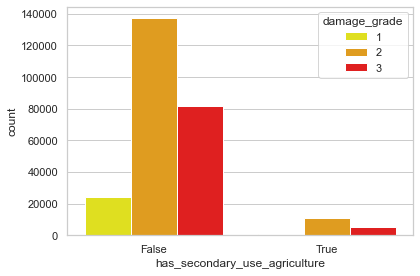

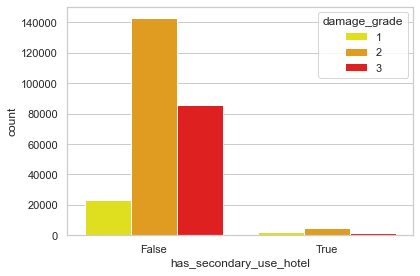

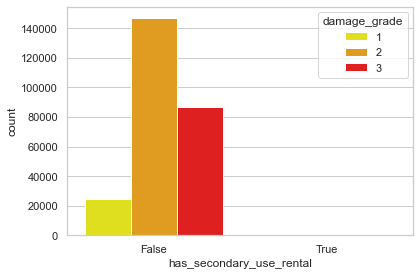

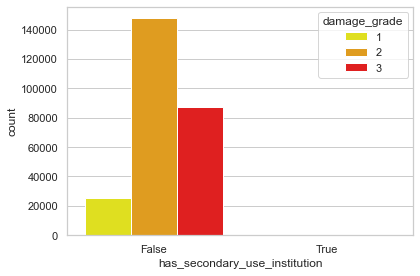

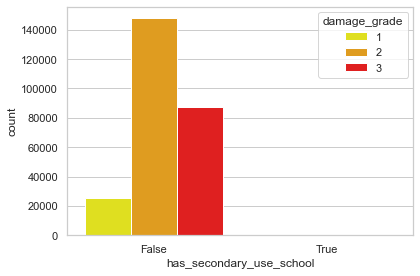

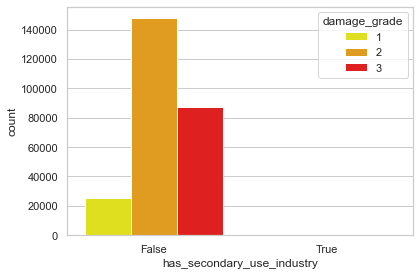

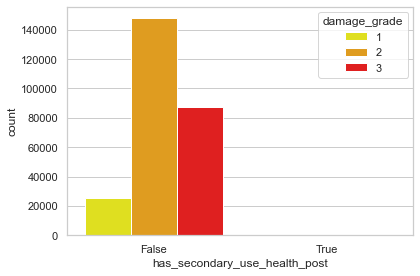

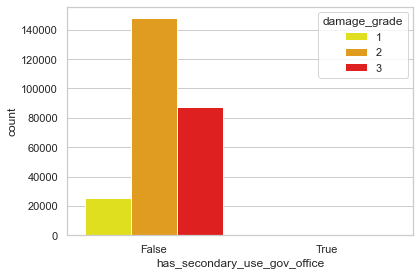

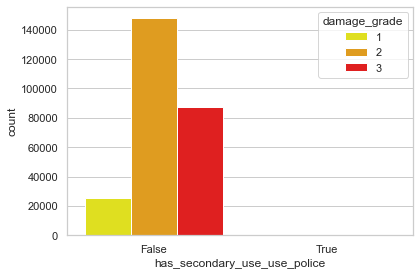

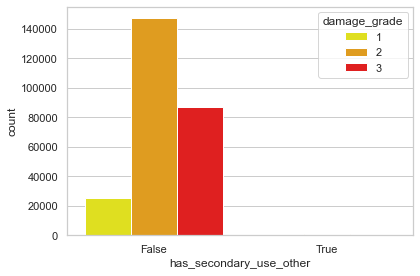

In [22]:
column_secondary = list(df.columns)[28:-1]

countplot_loop(column_secondary)

#### Other Columns

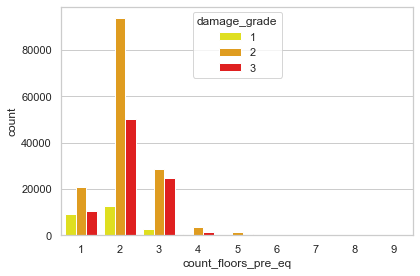

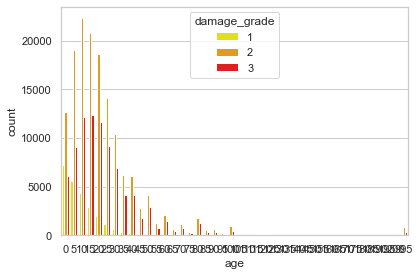

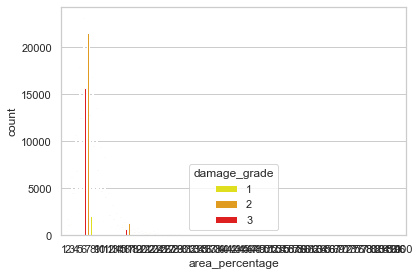

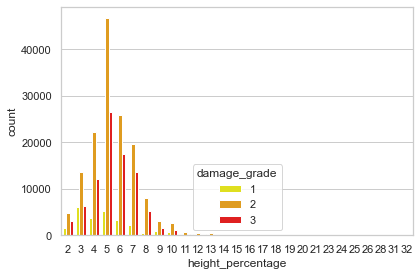

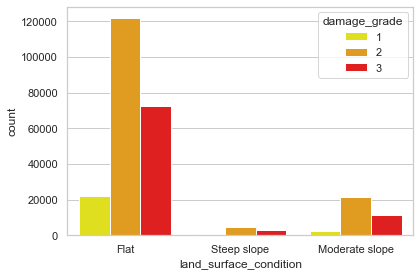

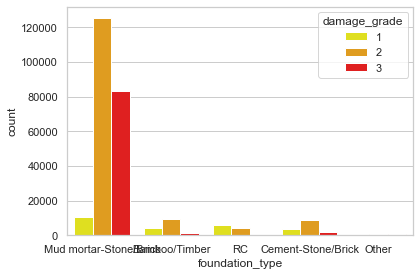

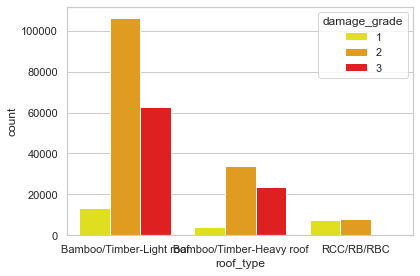

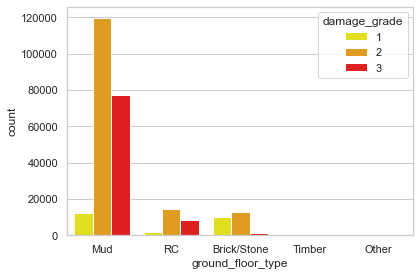

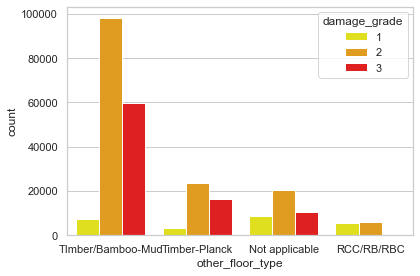

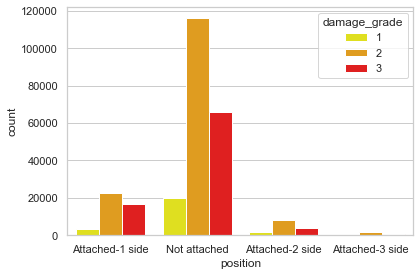

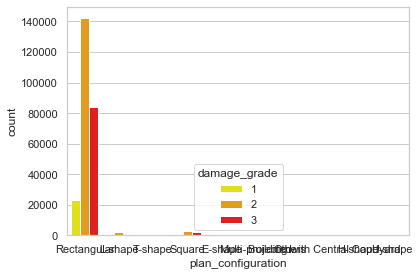

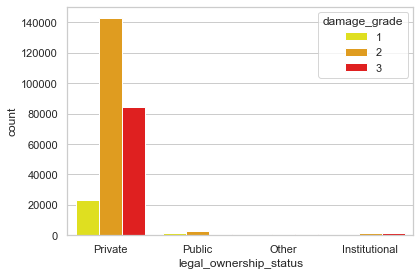

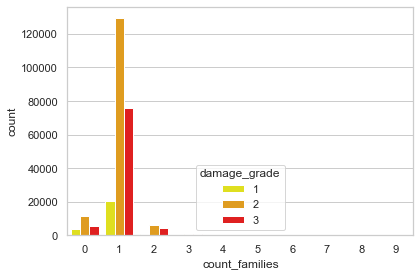

In [23]:
column_other = list(df.columns)[4:15] + list(df.columns)[26:28]

countplot_loop(column_other)

## First Simple Model (FSM)

For the FSM we will use just the numerical and boolean columns and the classifier we will use a Decision Tree Classifer. First things first, we need to split that train by doing a train test split.

In [24]:
X_fsm = df.drop(['building_id', 'land_surface_condition', 'foundation_type', 
         'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 
         'legal_ownership_status', 'damage_grade'], axis=1)
y_fsm = df['damage_grade']

X_train_fsm, X_test_fsm, y_train_fsm, y_test_fsm = train_test_split(X_fsm, y_fsm, random_state=42, stratify=y_fsm)

In [25]:
fsm_dt = DecisionTreeClassifier(random_state=42, )
fsm_dt.fit(X_train_fsm, y_train_fsm)

DecisionTreeClassifier(random_state=42)

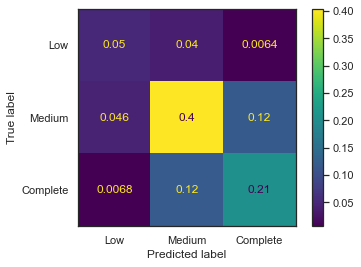

In [60]:
sns.set_theme(style="white")

plot_confusion_matrix(fsm_dt, X_test_fsm, y_test_fsm, normalize='all', 
                      display_labels=['Low', 'Medium', 'Complete']);

In [61]:
sns.set_theme(style="whitegrid")

In [27]:
y_hat_fsm = fsm_dt.predict(X_test_fsm)

In [28]:
print('  First Simple Model Scores')
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_test_fsm, y_hat_fsm))
print('   Recall:', recall_score(y_test_fsm, y_hat_fsm, average = 'macro'))
print('Precision:', precision_score(y_test_fsm, y_hat_fsm, average = 'macro'))
print('       F1:', f1_score(y_test_fsm, y_hat_fsm, average = 'macro'))

  First Simple Model Scores
-----------------------------
 Accuracy: 0.6604503384445365
   Recall: 0.6149900294776912
Precision: 0.6073121797582424
       F1: 0.6109604665814518


## Preprocessing

In [29]:
X = df.drop(['building_id', 'damage_grade'], axis=1)
y = df['damage_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [30]:
num_list = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 
            'height_percentage', 'count_families']
            
bool_list =['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',  'has_superstructure_stone_flag', 
            'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 
            'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 
            'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 
            'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 
            'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 
            'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 
            'has_secondary_use_other']

cat_list = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
            'position', 'plan_configuration', 'legal_ownership_status']

In [31]:
ct = ColumnTransformer([('ohe', OneHotEncoder(drop='first'), cat_list), 
                        ('ss', SimpleImputer(), num_list), 
                        ('si', SimpleImputer(), bool_list)])
X_train_ct = ct.fit_transform(X_train)
X_test_ct = ct.fit_transform(X_test)

In [32]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_sample(X_train_ct, y_train)

## Vanilla Models

### Decision Tree Classifier

In [66]:
# dt = DecisionTreeClassifier(random_state=42)
# dt.fit(X_train_sm, y_train_sm)

# with open('Pickle/decision_tree_vm', 'wb') as f:
#      pickle.dump(dt, f)

In [67]:
with open('Pickle/decision_tree_vm', 'rb') as f:
    dt = pickle.load(f)

In [68]:
y_hat_train = dt.predict(X_train_ct)
y_hat_test = dt.predict(X_test_ct)

print('Decision Tree Model Scores')
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_train, y_hat_train))
print('   Recall:', recall_score(y_train, y_hat_train, average = 'macro'))
print('Precision:', precision_score(y_train, y_hat_train, average = 'macro'))
print('       F1:', f1_score(y_train, y_hat_train, average = 'macro'))
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_test, y_hat_test))
print('   Recall:', recall_score(y_test, y_hat_test, average = 'macro'))
print('Precision:', precision_score(y_test, y_hat_test, average = 'macro'))
print('       F1:', f1_score(y_test, y_hat_test, average = 'macro'))

Decision Tree Model Scores
-----------------------------
 Accuracy: 0.9873369148119724
   Recall: 0.988092462682966
Precision: 0.9851123347712546
       F1: 0.9865082092326962
-----------------------------
 Accuracy: 0.646943254900155
   Recall: 0.6021645066748244
Precision: 0.5929683543662249
       F1: 0.5973294167900508


### KNeighborsClassifier

In [69]:
# knc = KNeighborsClassifier()
# knc.fit(X_train_sm, y_train_sm)

# with open('Pickle/kneighbors_vm', 'wb') as f:
#      pickle.dump(knc, f)

In [70]:
with open('Pickle/kneighbors_vm', 'rb') as f:
    knc = pickle.load(f)

In [71]:
y_hat_train = knc.predict(X_train_ct)
y_hat_test = knc.predict(X_test_ct)

print('KNeighborsClassifer Model Scores')
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_train, y_hat_train))
print('   Recall:', recall_score(y_train, y_hat_train, average = 'macro'))
print('Precision:', precision_score(y_train, y_hat_train, average = 'macro'))
print('       F1:', f1_score(y_train, y_hat_train, average = 'macro'))
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_test, y_hat_test))
print('   Recall:', recall_score(y_test, y_hat_test, average = 'macro'))
print('Precision:', precision_score(y_test, y_hat_test, average = 'macro'))
print('       F1:', f1_score(y_test, y_hat_test, average = 'macro'))

KNeighborsClassifer Model Scores
-----------------------------
 Accuracy: 0.7765106165259658
   Recall: 0.8258946020229
Precision: 0.7263370691321113
       F1: 0.7572691464515654
-----------------------------
 Accuracy: 0.6634894322420224
   Recall: 0.6880816897257244
Precision: 0.611128539767606
       F1: 0.633385319526554


### GaussianNB

In [72]:
# gnb = GaussianNB()
# gnb.fit(X_train_sm, y_train_sm)

# with open('Pickle/gaussian_nb_vm', 'wb') as f:
#      pickle.dump(gnb, f)

In [73]:
with open('Pickle/gaussian_nb_vm', 'rb') as f:
    gnb = pickle.load(f)

In [74]:
y_hat_train = gnb.predict(X_train_ct)
y_hat_test = gnb.predict(X_test_ct)

print('GaussianNB Model Scores')
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_train, y_hat_train))
print('   Recall:', recall_score(y_train, y_hat_train, average = 'macro'))
print('Precision:', precision_score(y_train, y_hat_train, average = 'macro'))
print('       F1:', f1_score(y_train, y_hat_train, average = 'macro'))
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_test, y_hat_test))
print('   Recall:', recall_score(y_test, y_hat_test, average = 'macro'))
print('Precision:', precision_score(y_test, y_hat_test, average = 'macro'))
print('       F1:', f1_score(y_test, y_hat_test, average = 'macro'))

GaussianNB Model Scores
-----------------------------
 Accuracy: 0.4222665643387056
   Recall: 0.5238633447369136
Precision: 0.4820254810161683
       F1: 0.40525117631533075
-----------------------------
 Accuracy: 0.42341637119921416
   Recall: 0.5273272948650579
Precision: 0.48493843628601613
       F1: 0.4088181014009207


### LogisticRegression

In [75]:
# lr = LogisticRegression()
# lr.fit(X_train_sm, y_train_sm)

# with open('Pickle/logistic_vm', 'wb') as f:
#      pickle.dump(lr, f)

C:\Users\drago\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
with open('Pickle/logistic_vm', 'rb') as f:
    lr = pickle.load(f)

In [77]:
y_hat_train = lr.predict(X_train_ct)
y_hat_test = lr.predict(X_test_ct)

print('Logisitic Regression Model Scores')
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_train, y_hat_train))
print('   Recall:', recall_score(y_train, y_hat_train, average = 'macro'))
print('Precision:', precision_score(y_train, y_hat_train, average = 'macro'))
print('       F1:', f1_score(y_train, y_hat_train, average = 'macro'))
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_test, y_hat_test))
print('   Recall:', recall_score(y_test, y_hat_test, average = 'macro'))
print('Precision:', precision_score(y_test, y_hat_test, average = 'macro'))
print('       F1:', f1_score(y_test, y_hat_test, average = 'macro'))

Logisitic Regression Model Scores
-----------------------------
 Accuracy: 0.31900741877718086
   Recall: 0.4429848109015096
Precision: 0.390518064280658
       F1: 0.31276640307165304
-----------------------------
 Accuracy: 0.31981090083037866
   Recall: 0.44670901581043837
Precision: 0.39240549793664053
       F1: 0.3140840623426468


### Random Forest Classifer

In [78]:
# rfc = RandomForestClassifier(random_state=42)
# rfc.fit(X_train_sm, y_train_sm)

# with open('Pickle/random_forest_vm', 'wb') as f:
#      pickle.dump(dt, f)

In [79]:
with open('Pickle/random_forest_vm', 'rb') as f:
    rfc = pickle.load(f)

In [80]:
y_hat_train = rfc.predict(X_train_ct)
y_hat_test = rfc.predict(X_test_ct)

print('Random Forest Model Scores')
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_train, y_hat_train))
print('   Recall:', recall_score(y_train, y_hat_train, average = 'macro'))
print('Precision:', precision_score(y_train, y_hat_train, average = 'macro'))
print('       F1:', f1_score(y_train, y_hat_train, average = 'macro'))
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_test, y_hat_test))
print('   Recall:', recall_score(y_test, y_hat_test, average = 'macro'))
print('Precision:', precision_score(y_test, y_hat_test, average = 'macro'))
print('       F1:', f1_score(y_test, y_hat_test, average = 'macro'))

Random Forest Model Scores
-----------------------------
 Accuracy: 0.9873369148119724
   Recall: 0.988092462682966
Precision: 0.9851123347712546
       F1: 0.9865082092326962
-----------------------------
 Accuracy: 0.646943254900155
   Recall: 0.6021645066748244
Precision: 0.5929683543662249
       F1: 0.5973294167900508


### XGB Classifer

In [81]:
xgb = XGBClassifier()
xgb.fit(X_train_sm, y_train_sm)

with open('Pickle/xgb_vm', 'wb') as f:
     pickle.dump(xgb, f)

C:\Users\drago\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:57:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [82]:
with open('Pickle/xgb_vm', 'rb') as f:
    xgb = pickle.load(f)

In [83]:
y_hat_train = xgb.predict(X_train_ct)
y_hat_test = xgb.predict(X_test_ct)

print('XGB Classifer Model Scores')
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_train, y_hat_train))
print('   Recall:', recall_score(y_train, y_hat_train, average = 'macro'))
print('Precision:', precision_score(y_train, y_hat_train, average = 'macro'))
print('       F1:', f1_score(y_train, y_hat_train, average = 'macro'))
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_test, y_hat_test))
print('   Recall:', recall_score(y_test, y_hat_test, average = 'macro'))
print('Precision:', precision_score(y_test, y_hat_test, average = 'macro'))
print('       F1:', f1_score(y_test, y_hat_test, average = 'macro'))

XGB Classifer Model Scores
-----------------------------
 Accuracy: 0.733251470964441
   Recall: 0.6606636902763361
Precision: 0.72117487377136
       F1: 0.6845419811772505
-----------------------------
 Accuracy: 0.7216312873171555
   Recall: 0.6446161127629831
Precision: 0.7007266196691101
       F1: 0.6667827021617386


## Hyperparameter Tuning

### Pipelines

In [51]:
X = df.drop(['building_id', 'damage_grade'], axis=1)
y = df['damage_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [52]:
ct = ColumnTransformer([('ohe', OneHotEncoder(drop='first'), cat_list), 
                        ('si_num', SimpleImputer(), num_list), 
                        ('si_bool', SimpleImputer(), bool_list)])

sm = SMOTE(random_state=42)

In [53]:
pipe_knc = Pipeline([('ct_pipe', ct), 
                 ('sm_pipe', sm), 
                 ('knc_pipe', KNeighborsClassifier())])

param_grid_knc = {
    'knc_pipe__n_neighbors': [3, 5, 10, 12],
    'knc_pipe__weights': ['uniform', 'distance'],
    'knc_pipe__p': [1, 2],
    'knc_pipe__n_jobs': [-1, 1, 2]
}

### GridSearchCV - KNeighors

In [54]:
# gs_cv = GridSearchCV(estimator=pipe_knc, param_grid=param_grid_knc, scoring='recall_macro', 
#                      cv=5, verbose=1, return_train_score=True)
# gs_cv.fit(X_train, y_train)

# with open('Pickle/gird_search_knc', 'wb') as f:
#      pickle.dump(gs_cv, f)

In [55]:
with open('Pickle/gird_search_knc', 'rb') as f:
    gs_cv = pickle.load(f)

In [56]:
gs_cv.best_score_

0.6965513290275445

In [57]:
gs_cv.best_params_

{'knc_pipe__n_jobs': -1,
 'knc_pipe__n_neighbors': 10,
 'knc_pipe__p': 1,
 'knc_pipe__weights': 'uniform'}

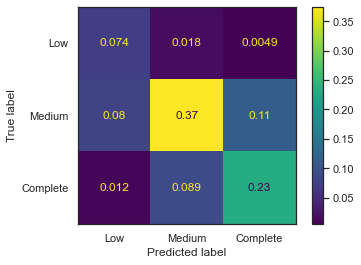

In [62]:
sns.set_theme(style="white")

plot_confusion_matrix(gs_cv, X_test, y_test, normalize='all', display_labels=['Low', 'Medium', 'Complete']);

In [63]:
sns.set_theme(style="whitegrid")

In [65]:
y_hat_train = gs_cv.predict(X_train)
y_hat_test = gs_cv.predict(X_test)

print('Grid Search KNeighbors Model Scores')
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_train, y_hat_train))
print('   Recall:', recall_score(y_train, y_hat_train, average = 'macro'))
print('Precision:', precision_score(y_train, y_hat_train, average = 'macro'))
print('       F1:', f1_score(y_train, y_hat_train, average = 'macro'))
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_test, y_hat_test))
print('   Recall:', recall_score(y_test, y_hat_test, average = 'macro'))
print('Precision:', precision_score(y_test, y_hat_test, average = 'macro'))
print('       F1:', f1_score(y_test, y_hat_test, average = 'macro'))

Grid Search KNeighbors Model Scores
-----------------------------
 Accuracy: 0.748119723714505
   Recall: 0.7940375301737518
Precision: 0.6971429279434084
       F1: 0.7264383087951195
-----------------------------
 Accuracy: 0.6826295835827539
   Recall: 0.7084329101607633
Precision: 0.6293136855468423
       F1: 0.6529252985576525
